In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
experiments = []
exp_type = ['experiment', 'random']
algorithms = ['offpac', 'opposd']
experiment_sizes = [2000, 3000, 6000, 12000, 24000]
random_sizes = [1000, 2500, 5000, 10000, 100000]
sizes = [experiment_sizes, random_sizes]
for type, size in zip (exp_type, sizes):
    for number in size:
        for alg in algorithms:
            return_dict = {}
            my_data = genfromtxt("experiments_results/%s_%s_%d.csv"%(type, alg, number), delimiter=',')
            return_dict.update({'algorithm' : alg,
                                'batch_size' : number,
                                'batch_origin' : type,
                                'data': my_data})
            experiments = np.append(experiments, return_dict)

In [13]:
def plot_data(algorithm, batch_origin, experiments=experiments):
    plt.figure(figsize=(8, 6), dpi=80)
    i = 0

    for exp in experiments:
        if exp['algorithm'] == algorithm and exp['batch_origin'] == batch_origin:
            window = max(int(len(exp['data']) / 10), 1)
            # if len(exp.episode_losses) < window + 2: return
            returns = np.convolve(exp['data'], np.ones(window) / window, 'valid')
            # Determine x-axis based on samples or episodes
            x_returns = [i + window for i in range(len(returns))]
            plt.plot(x_returns, returns, label='%d'%(exp['batch_size']))
    plt.axhline(y=4.01, color='k', linestyle='--', label='Heuristic algorithm average score')
    plt.xlabel('Environment interaction')
    plt.ylabel('Episode return')
    plt.legend()
    plt.title('Pacing environment - %s' % (algorithm.upper()))
    plt.savefig("generated_graphs/%s_%s.pdf"%(algorithm, batch_origin))
    # plt.legend(['OFFPAC', 'PPO Learner', 'Heuristic agent average score'])

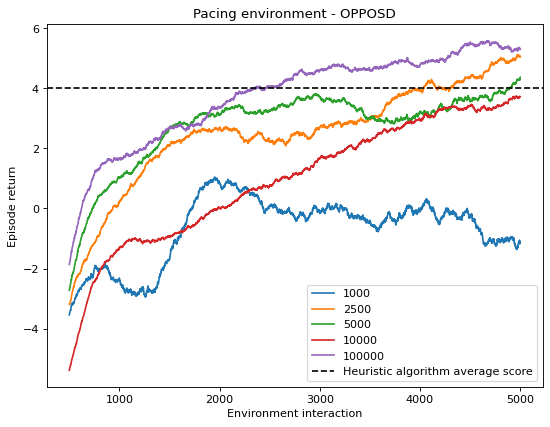

In [4]:
plot_data('opposd', 'random')

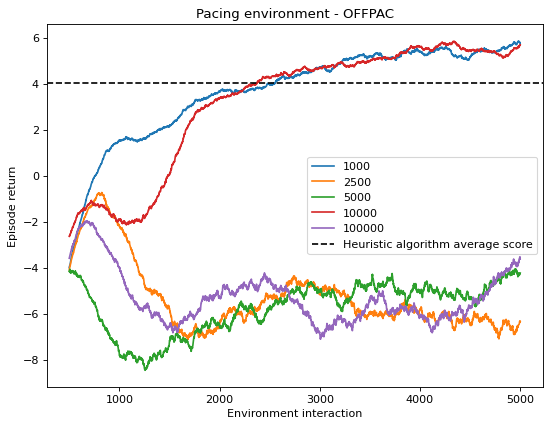

In [5]:
plot_data('offpac', 'random')

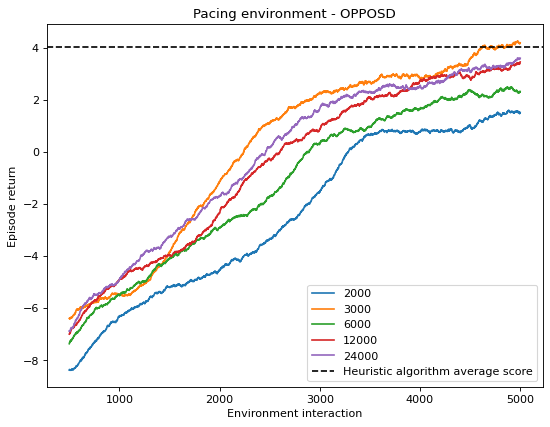

In [6]:
plot_data('opposd', 'experiment')

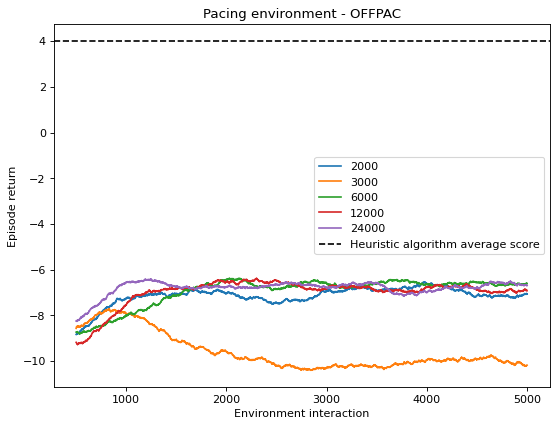

In [7]:
plot_data('offpac', 'experiment')

In [8]:
experiments = []
exp_type = ['random']
algorithms = ['offpac', 'opposd']
for type in exp_type:
    for alg in algorithms:
        return_dict = {}
        my_data = genfromtxt("show_work/%s_%s_%d.csv"%(type, alg, 100000), delimiter=',')
        return_dict.update({'algorithm' : alg,
                            'batch_origin' : type,
                            'data': my_data})
        experiments = np.append(experiments, return_dict)

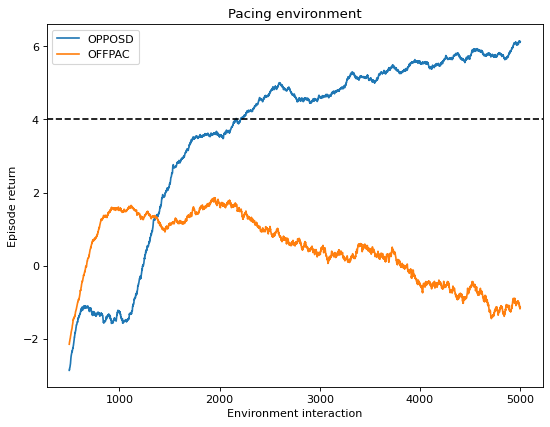

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
i = 0

for exp in experiments:
        window = max(int(len(exp['data']) / 10), 1)
        # if len(exp.episode_losses) < window + 2: return
        returns = np.convolve(exp['data'], np.ones(window) / window, 'valid')
        # Determine x-axis based on samples or episodes
        x_returns = [i + window for i in range(len(returns))]
        plt.plot(x_returns, returns)
plt.axhline(y=4.01, color='k', linestyle='--', label='Heuristic algorithm average score')
plt.xlabel('Environment interaction')
plt.ylabel('Episode return')
plt.legend(['OPPOSD', 'OFFPAC'])
plt.title('Pacing environment')
plt.savefig("generated_graphs/comp_5e3.pdf")

In [15]:
experiments_opposd = []
type = 'experiment'
alg = 'opposd'
experiment_sizes = [2000, 3000, 6000, 12000, 24000]
# experiment_sizes = [3000, 6000, 12000, 24000]
# it = ['', '_1', '_2', '_3']
it = ['', '_2', '_3']
sizes = [experiment_sizes, random_sizes]
for size in experiment_sizes:
    for i in it:
        return_dict = {}
        my_data = genfromtxt("experiments_results/%s_%s_%d%s.csv"%(type, alg, size, i), delimiter=',')
        return_dict.update({'algorithm' : alg,
                            'batch_size' : size,
                            'batch_origin' : type,
                            'data': my_data})
        experiments_opposd = np.append(experiments_opposd, return_dict)

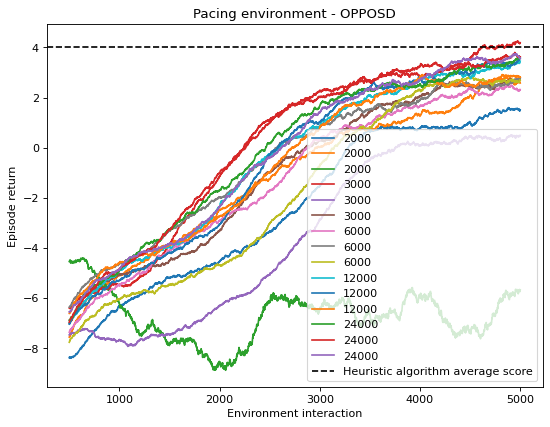

In [16]:
plot_data('opposd', 'experiment', experiments_opposd)